In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
from optimalEmbedding_sampling import run_optEmbedding_sampling
from GCCM_sampling import run_GCCM_sampling
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from diffusion import remove_linear_signals, run_sim
from plot import get_mean, get_interval, make_Eplot, make_Lplot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Set specific font sizes
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 11,     # Title font size
    'axes.labelsize': 11,     # X and Y axis labels font size
    'xtick.labelsize': 9,    # X-axis tick labels font size
    'ytick.labelsize': 9,    # Y-axis tick labels font size
    'legend.fontsize': 10,    # Legend font size
})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

$$ \frac{\partial x}{\partial t} = \alpha_1 \Delta x - x^2 $$

$$ \frac{\partial y}{\partial t} = \alpha_2 \Delta y - y^2 + c~xy $$

## Parameters

In [7]:
dims = np.arange(1,9)
lib_sizes = np.arange(10,101,30)
lib_size = 100

In [9]:
size = 100  # size of the 2D grid
dx = 2. / size  # space step
a1 = 2.8e-4 # 5e-3
a2 = 2.8e-4

In [10]:
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)
results_random = run_optEmbedding_sampling(X_rand, Y_rand, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


# Version 1

In [11]:
np.random.seed(seed=3)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

### no coupling

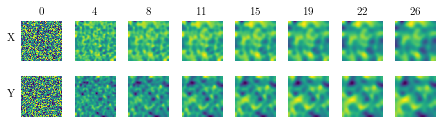

In [13]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0, a1=a1, a2=a2, saveas='plots/diffusion_short/v1_c00_sim30.pdf')

In [14]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 
# Essentially, this means that changes in the pixel values of one image are not strongly associated with 
#changes in the pixel values of the other image.

(-0.05264822035527712, 1.3805543185885576e-07)

In [15]:
results_0 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [16]:
results_0_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


### weak

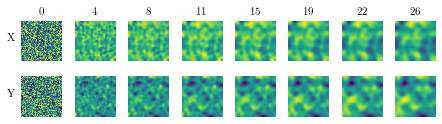

In [19]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.07, a1=a1, a2=a2)

In [20]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.11247939650921081, 1.6040027420126858e-29)

In [21]:
results_007 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [22]:
results_007_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


### moderate

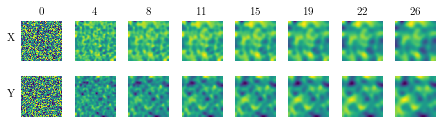

In [23]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2, saveas='plots/diffusion_short/v1_c01_sim30.pdf')

In [24]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.18649541537875985, 5.967984171288022e-79)

In [25]:
results_01 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [26]:
results_01_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


### strong

As processes become tightly coupled, each tends to become a good estimators of the others’ dynamics even though causation is unidirectional

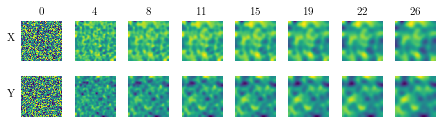

In [27]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.2, a1=a1, a2=a2)

In [28]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.427726548186521, 0.0)

In [29]:
results_02 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [30]:
results_02_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


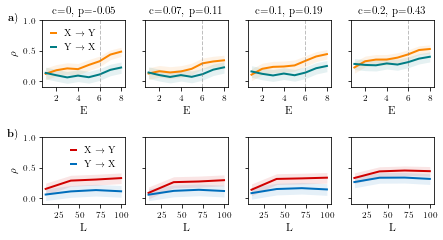

In [31]:
fig = plt.figure(figsize=(6.3, 3.5))

# Creating subplots using the functions
ax1 = make_Eplot(fig, 241, results_0, title=r'c=0, p=-0.05')
ax1.axvline(x=7, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.text(-0.35, 1.0, r'$\textbf a)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Eplot(fig, 242, results_007, title=r'c=0.07, p=0.11', share=True)
ax2.axvline(x=7, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 243, results_01, title=r'c=0.1, p=0.19', share=True)
ax2.axvline(x=7, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 244, results_02, title=r'c=0.2, p=0.43', share=True)
ax2.axvline(x=7, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax1 = make_Lplot(fig, 245, results_0_L)
ax1.text(-0.35, 1.0, r'$\textbf b)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Lplot(fig, 246, results_007_L, share=True)
ax2 = make_Lplot(fig, 247, results_01_L, share=True)
ax2 = make_Lplot(fig, 248, results_02_L, share=True)

plt.tight_layout()
plt.savefig('plots/diffusion_short/v1_crange_short.pdf', bbox_inches='tight')

# Version 2

In [32]:
np.random.seed(seed=54) #27: 0.15
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

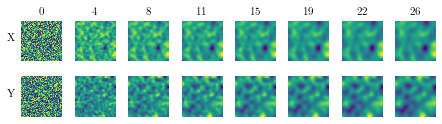

In [35]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.0, a1=a1, a2=a2, saveas='plots/diffusion_short/v2_c00_sim30.pdf')

In [37]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 
# Essentially, this means that changes in the pixel values of one image are not strongly associated with 
#changes in the pixel values of the other image.

(0.04817993338225585, 1.434213752350198e-06)

In [38]:
r2esults_0 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [39]:
r2esults_0_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


### weak

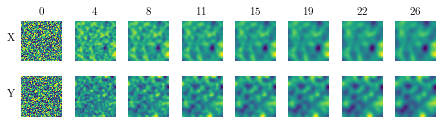

In [44]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.02, a1=a1, a2=a2)

In [45]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.12660012087228822, 5.230388687103053e-37)

In [46]:
r2esults_005 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [47]:
r2esults_005_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


### moderate

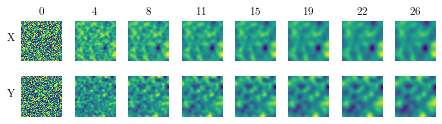

In [51]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.05, a1=a1, a2=a2, saveas='plots/diffusion_short/v2_c005_sim30.pdf')

In [52]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.2434677884735192, 7.099057918816838e-135)

In [53]:
r2esults_008 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [54]:
r2esults_008_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


### strong

As processes become tightly coupled, each tends to become a good estimators of the others’ dynamics even though causation is unidirectional

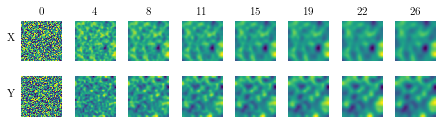

In [55]:
X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2)

In [56]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.4246797386127624, 0.0)

In [57]:
r2esults_01 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [58]:
r2esults_01_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


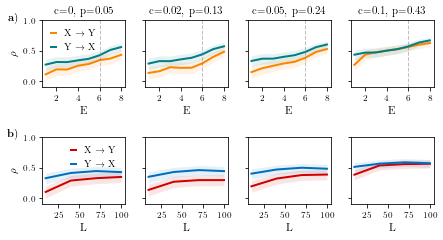

In [59]:
fig = plt.figure(figsize=(6.3, 3.5))

# Creating subplots using the functions
ax1 = make_Eplot(fig, 241, r2esults_0, title=r'c=0, p=0.05')
ax1.axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.text(-0.35, 1.0, r'$\textbf a)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Eplot(fig, 242, r2esults_005, title=r'c=0.02, p=0.13', share=True)
ax2.axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 243, r2esults_008, title=r'c=0.05, p=0.24', share=True)
ax2.axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 244, r2esults_01, title=r'c=0.1, p=0.43', share=True)
ax2.axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)


ax1 = make_Lplot(fig, 245, r2esults_0_L)
ax1.text(-0.35, 1.0, r'$\textbf b)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Lplot(fig, 246, r2esults_005_L, share=True)
ax2 = make_Lplot(fig, 247, r2esults_008_L, share=True)
ax2 = make_Lplot(fig, 248, r2esults_01_L, share=True)

plt.tight_layout()
plt.savefig('plots/diffusion_short/v2_crange_short.pdf', bbox_inches='tight')

# Diffusion parameter a

## version 1

In [226]:
np.random.seed(seed=3)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

In [227]:
a1 = 2.8e-4  # X
a2 = 1.4e-4  # Y

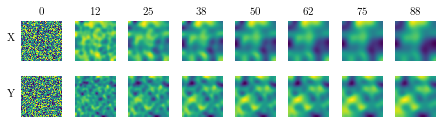

In [228]:
X, Y = run_sim(X_rand, Y_rand, T=100, c=0.1, a1=a1, a2=a2)

In [229]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.17983977718042032, 1.8567667148205588e-73)

In [230]:
rdesults_01 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [231]:
rdesults_01_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


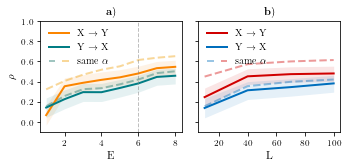

In [534]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharey=True)

x_xmap_y, y_xmap_x = get_mean(results_01, dims)
p1,= ax[0].plot(dims, x_xmap_y, '--', c='#136F63', alpha=0.4, lw=2)
p2,= ax[0].plot(dims, y_xmap_x, '--', c='#EE9B00', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(rdesults_01, dims)
xy_u, xy_l, yx_u, yx_l = get_interval(rdesults_01, dims)
p3,=ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
p4,=ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=2, label = r'Y $\rightarrow$ X' )
ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

x_xmap_y, y_xmap_x = get_mean(results_01_L, lib_sizes)
p1,= ax[1].plot(lib_sizes, x_xmap_y, '--', c='#006EBC', alpha=0.4, lw=2)
p2,= ax[1].plot(lib_sizes, y_xmap_x, '--', c='#D00000', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(rdesults_01_L, lib_sizes)
xy_u, xy_l, yx_u, yx_l = get_interval(rdesults_01_L, lib_sizes)
p3, = ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
p4,=ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X' )
ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion/v1_c01_diffhalf.pdf', bbox_inches='tight')

In [233]:
a1 = 2.8e-4  # X
a2 = 0.7e-4  # Y

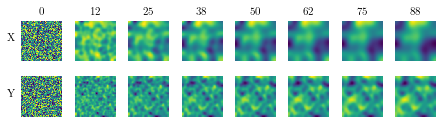

In [234]:
X, Y = run_sim(X_rand, Y_rand, T=100, c=0.1, a1=a1, a2=a2)

In [235]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.12357232986859569, 2.509320734030249e-35)

In [236]:
rddesults_01 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [237]:
rddesults_01_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


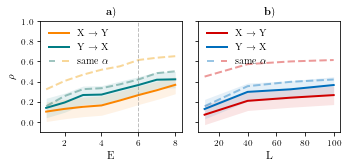

In [535]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharey=True)

x_xmap_y, y_xmap_x = get_mean(results_01, dims)
p1,= ax[0].plot(dims, x_xmap_y, '--', c='#136F63', alpha=0.4, lw=2)
p2,= ax[0].plot(dims, y_xmap_x, '--', c='#EE9B00', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(rddesults_01, dims)
xy_u, xy_l, yx_u, yx_l = get_interval(rddesults_01, dims)
p3,=ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
p4,=ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=2, label = r'Y $\rightarrow$ X' )
ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

x_xmap_y, y_xmap_x = get_mean(results_01_L, lib_sizes)
p1,= ax[1].plot(lib_sizes, x_xmap_y, '--', c='#006EBC', alpha=0.4, lw=2)
p2,= ax[1].plot(lib_sizes, y_xmap_x, '--', c='#D00000', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(rddesults_01_L, lib_sizes)
xy_u, xy_l, yx_u, yx_l = get_interval(rddesults_01_L, lib_sizes)
p3, = ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
p4,=ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X' )
ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion/v1_c01_diffquart.pdf', bbox_inches='tight')

## version 2

In [201]:
np.random.seed(seed=54)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

In [200]:
a1 = 1.4e-4  # X
a2 = 2.8e-4  # Y

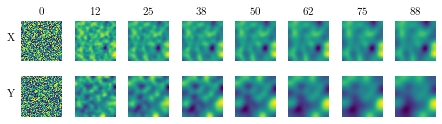

In [202]:
X, Y = run_sim(X_rand, Y_rand, T=100, c=0.05, a1=a1, a2=a2)

In [203]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.30786315418640064, 1.689732862310002e-218)

In [204]:
r2desults_005 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [205]:
r2desults_005_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


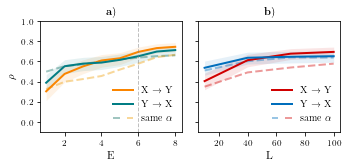

In [536]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharey=True)

x_xmap_y, y_xmap_x = get_mean(r2esults_005, dims)
p1,= ax[0].plot(dims, x_xmap_y, '--', c='#136F63', alpha=0.4, lw=2)
p2,= ax[0].plot(dims, y_xmap_x, '--', c='#EE9B00', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(r2desults_005, dims)
xy_u, xy_l, yx_u, yx_l = get_interval(r2desults_005, dims)
p3,=ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
p4,=ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=2, label = r'Y $\rightarrow$ X' )
ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

x_xmap_y, y_xmap_x = get_mean(r2esults_005_L, lib_sizes)
p1,= ax[1].plot(lib_sizes, x_xmap_y, '--', c='#006EBC', alpha=0.4, lw=2)
p2,= ax[1].plot(lib_sizes, y_xmap_x, '--', c='#D00000', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(r2desults_005_L, lib_sizes)
xy_u, xy_l, yx_u, yx_l = get_interval(r2desults_005_L, lib_sizes)
p3, = ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
p4,=ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X' )
ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion/v2_c005_diffhalf.pdf', bbox_inches='tight')

In [217]:
a1 = 0.7e-4  # X
a2 = 2.8e-4  # Y

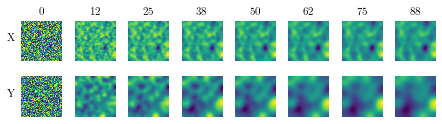

In [218]:
X, Y = run_sim(X_rand, Y_rand, T=100, c=0.05, a1=a1, a2=a2)

In [219]:
correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
correlation_coefficient, p_value 

(0.3152798399613768, 1.2727537440356683e-229)

In [220]:
r2ddesults_005 = run_optEmbedding_sampling(X, Y, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [221]:
r2ddesults_005_L = run_GCCM_sampling(X, Y, lib_sizes, E=6, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


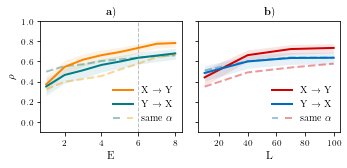

In [537]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharey=True)

x_xmap_y, y_xmap_x = get_mean(r2esults_005, dims)
p1,= ax[0].plot(dims, x_xmap_y, '--', c='#136F63', alpha=0.4, lw=2)
p2,= ax[0].plot(dims, y_xmap_x, '--', c='#EE9B00', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(r2ddesults_005, dims)
xy_u, xy_l, yx_u, yx_l = get_interval(r2ddesults_005, dims)
p3,=ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
p4,=ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=2, label = r'Y $\rightarrow$ X' )
ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     loc='lower right', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

x_xmap_y, y_xmap_x = get_mean(r2esults_005_L, lib_sizes)
p1,= ax[1].plot(lib_sizes, x_xmap_y, '--', c='#006EBC', alpha=0.4, lw=2)
p2,= ax[1].plot(lib_sizes, y_xmap_x, '--', c='#D00000', alpha=0.4, lw=2)

x_xmap_y, y_xmap_x = get_mean(r2ddesults_005_L, lib_sizes)
xy_u, xy_l, yx_u, yx_l = get_interval(r2ddesults_005_L, lib_sizes)
p3, = ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
p4, = ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X' )
ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', r'same $\alpha$'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     loc='lower right', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion/v2_c005_diffquart.pdf', bbox_inches='tight')

# Initialisation

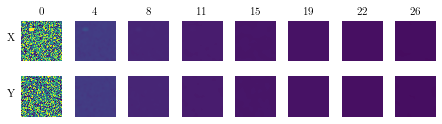

In [108]:
np.random.seed(seed=18)
Y_rand = np.random.rand(size, size)
X_loc = np.random.rand(size, size)

top_row, left_col = 20, 20
bottom_row, right_col = 25, 30
X_loc[top_row:bottom_row+1, left_col:right_col+1] = 5

sX0r, sY0r = run_sim(X_loc, Y_rand, T=30, c=0, a1=a1, a2=a2)

In [109]:
correlation_coefficient, p_value = pearsonr(sX0r.flatten(), sY0r.flatten())
correlation_coefficient, p_value 

(-0.09077742733506859, 9.424666934360318e-20)

In [111]:
sriresults_0 = run_optEmbedding_sampling(sX0r, sY0r, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [112]:
sriresults_0_L = run_GCCM_sampling(sX0r, sY0r, lib_sizes, E=3, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [113]:
sX0r_star, sY0r_star= remove_linear_signals(sX0r, sY0r)
correlation_coefficient, p_value = pearsonr(sX0r_star.flatten(), sY0r_star.flatten())
correlation_coefficient, p_value 

(0.09077742733506863, 9.424666934360318e-20)

In [114]:
sriresults_0_re = run_optEmbedding_sampling(sX0r_star, sY0r_star, lib_size, dims, cores=6)
sriresults_0_L_re = run_GCCM_sampling(sX0r_star, sY0r_star, lib_sizes, E=3, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


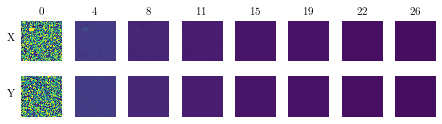

In [115]:
np.random.seed(seed=18)
Y_rand = np.random.rand(size, size)
X_loc = np.random.rand(size, size)

top_row, left_col = 20, 20
bottom_row, right_col = 25, 30
X_loc[top_row:bottom_row+1, left_col:right_col+1] = 5

sX005r, sY005r = run_sim(X_loc, Y_rand, T=30, c=0.05, a1=a1, a2=a2)

In [116]:
correlation_coefficient, p_value = pearsonr(sX005r.flatten(), sY005r.flatten())
correlation_coefficient, p_value 

(0.20329470213996986, 9.114309232743726e-94)

In [117]:
sriresults_005 = run_optEmbedding_sampling(sX005r, sY005r, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [118]:
sriresults_005_L = run_GCCM_sampling(sX005r, sY005r, lib_sizes, E=4, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [119]:
sX005r_star, sY005r_star= remove_linear_signals(sX005r, sY005r)
correlation_coefficient, p_value = pearsonr(sX005r_star.flatten(), sY005r_star.flatten())
correlation_coefficient, p_value 

(-0.2032947021399695, 9.11430923273845e-94)

In [120]:
sriresults_005_re = run_optEmbedding_sampling(sX005r_star, sY005r_star, lib_size, dims, cores=6)
sriresults_005_L_re = run_GCCM_sampling(sX005r_star, sY005r_star, lib_sizes, E=3, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


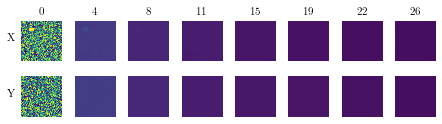

In [121]:
np.random.seed(seed=18)
Y_rand = np.random.rand(size, size)
X_loc = np.random.rand(size, size)

top_row, left_col = 20, 20
bottom_row, right_col = 25, 30
X_loc[top_row:bottom_row+1, left_col:right_col+1] = 5

sX01r, sY01r = run_sim(X_loc, Y_rand, T=30, c=0.1, a1=a1, a2=a2)

In [122]:
correlation_coefficient, p_value = pearsonr(sX01r.flatten(), sY01r.flatten())
correlation_coefficient, p_value 

(0.4629077635205724, 0.0)

In [123]:
sriresults_01 = run_optEmbedding_sampling(sX01r, sY01r, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [124]:
sriresults_01_L = run_GCCM_sampling(sX005r, sY01r, lib_sizes, E=5, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [125]:
sX01r_star, sY01r_star= remove_linear_signals(sX01r, sY01r)
correlation_coefficient, p_value = pearsonr(sX01r_star.flatten(), sY01r_star.flatten())
correlation_coefficient, p_value 

(-0.4629077635205716, 0.0)

In [126]:
sriresults_01_re = run_optEmbedding_sampling(sX01r_star, sY01r_star, lib_size, dims, cores=6)
sriresults_01_L_re = run_GCCM_sampling(sX01r_star, sY01r_star, lib_sizes, E=3, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


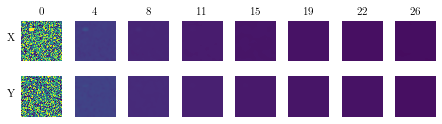

In [127]:
np.random.seed(seed=18)
Y_rand = np.random.rand(size, size)
X_loc = np.random.rand(size, size)

top_row, left_col = 20, 20
bottom_row, right_col = 25, 30
X_loc[top_row:bottom_row+1, left_col:right_col+1] = 5

sX02r, sY02r = run_sim(X_loc, Y_rand, T=30, c=0.2, a1=a1, a2=a2)

In [128]:
correlation_coefficient, p_value = pearsonr(sX02r.flatten(), sY02r.flatten())
correlation_coefficient, p_value 

(0.767414749317082, 0.0)

In [129]:
sriresults_02 = run_optEmbedding_sampling(sX02r, sY02r, lib_size, dims, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [130]:
sriresults_02_L = run_GCCM_sampling(sX02r, sY02r, lib_sizes, E=5, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


In [131]:
sX02r_star, sY02r_star= remove_linear_signals(sX02r, sY02r)
correlation_coefficient, p_value = pearsonr(sX02r_star.flatten(), sY02r_star.flatten())
correlation_coefficient, p_value 

(-0.7674147493170816, 0.0)

In [132]:
sriresults_02_re = run_optEmbedding_sampling(sX02r_star, sY02r_star, lib_size, dims, cores=6)
sriresults_02_L_re = run_GCCM_sampling(sX02r_star, sY02r_star, lib_sizes, E=3, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


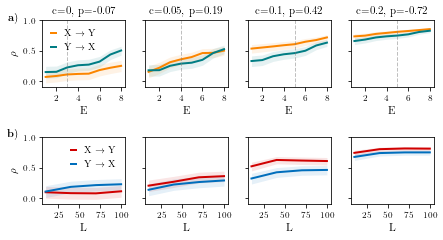

In [133]:
fig = plt.figure(figsize=(6.3, 3.5))

# Creating subplots using the functions
ax1 = make_Eplot(fig, 241, sriresults_0, title=r'c=0, p=-0.07')
ax1.axvline(x=3, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.text(-0.35, 1.0, r'$\textbf a)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Eplot(fig, 242, sriresults_005, title=r'c=0.05, p=0.19', share=True)
ax2.axvline(x=4, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 243, sriresults_01, title=r'c=0.1, p=0.42', share=True)
ax2.axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 244, sriresults_02, title=r'c=0.2, p=-0.72', share=True)
ax2.axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)


ax1 = make_Lplot(fig, 245, sriresults_0_L)
ax1.text(-0.35, 1.0, r'$\textbf b)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Lplot(fig, 246, sriresults_005_L, share=True)
ax2 = make_Lplot(fig, 247, sriresults_01_L, share=True)
ax2 = make_Lplot(fig, 248, sriresults_02_L, share=True)

plt.tight_layout()
plt.savefig('plots/diffusion_short/init_crange_short30.pdf', bbox_inches='tight')

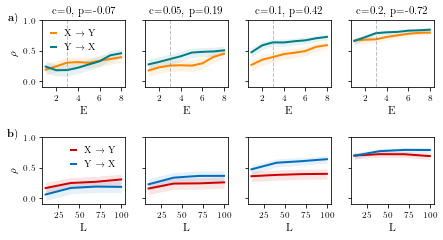

In [135]:
fig = plt.figure(figsize=(6.3, 3.5))

# Creating subplots using the functions
ax1 = make_Eplot(fig, 241, sriresults_0_re, title=r'c=0, p=-0.07')
ax1.axvline(x=3, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.text(-0.35, 1.0, r'$\textbf a)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Eplot(fig, 242, sriresults_005_re, title=r'c=0.05, p=0.19', share=True)
ax2.axvline(x=3, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 243, sriresults_01_re, title=r'c=0.1, p=0.42', share=True)
ax2.axvline(x=3, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2 = make_Eplot(fig, 244, sriresults_02_re, title=r'c=0.2, p=-0.72', share=True)
ax2.axvline(x=3, color='gray', linestyle='--', linewidth=1, alpha=0.5)


ax1 = make_Lplot(fig, 245, sriresults_0_L_re)
ax1.text(-0.35, 1.0, r'$\textbf b)$', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
ax2 = make_Lplot(fig, 246, sriresults_005_L_re, share=True)
ax2 = make_Lplot(fig, 247, sriresults_01_L_re, share=True)
ax2 = make_Lplot(fig, 248, sriresults_02_L_re, share=True)

plt.tight_layout()
plt.savefig('plots/diffusion_short/init_crange_short30_removed.pdf', bbox_inches='tight')



$$ \frac{\partial z}{\partial t} = d_1 \Delta z - z^2 $$

$$ \frac{\partial x}{\partial t} = d_0 \Delta x - x^2 + c_1z $$

$$ \frac{\partial y}{\partial t} = d_0 \Delta y - y^2 + c_0 ~xy + c_2z $$

In [106]:
def plot_confound(X, Y, Z, T, c0, cx, cy, a, b):
    
    dt = .001  # time step, 
    n = int(T / dt)  # number of iterations

    fig, axes = plt.subplots(3,9, figsize=(12, 4))
    step_plot = n // 9
    # We simulate the PDE with the finite difference
    # method.
    for i in range(n):
        # We compute the Laplacian of u and v.
        deltaZ = laplacian(Z)
        deltaX = laplacian(X)
        deltaY = laplacian(Y)
        # We take the values of u and v inside the grid.
        Zc = Z[1:-1, 1:-1]
        Xc = X[1:-1, 1:-1]
        Yc = Y[1:-1, 1:-1]
        
        # We update the variables.
        Z[1:-1, 1:-1], X[1:-1, 1:-1], Y[1:-1, 1:-1] = \
            Zc + dt * (b * deltaZ - Zc**2),\
            Xc + dt * (a * deltaX - Xc**2 + cx*Zc),\
            Yc + dt * (a * deltaY - Yc**2 + c0 * Xc * Yc + cy*Zc)
        
        # Neumann conditions: derivatives at the edges
        # are null.
        for B in (X, Y, Z):
            B[0, :] = B[1, :]
            B[-1, :] = B[-2, :]
            B[:, 0] = B[:, 1]
            B[:, -1] = B[:, -2]
    
        # We plot the state of the system at
        # 9 different times.
        if i % step_plot == 0 and i < 9 * step_plot:
            ax = axes[0, i // step_plot]
            show_patterns(Z, ax=ax)
            ax.set_title(f'Z $t={i * dt:.2f}$')
            
            ax = axes[1, i // step_plot]
            show_patterns(X, ax=ax)
            ax.set_title(f'X $t={i * dt:.2f}$')
            
            ax = axes[2, i // step_plot]
            show_patterns(Y, ax=ax)
            ax.set_title(f'Y $t={i * dt:.2f}$')
    plt.tight_layout()

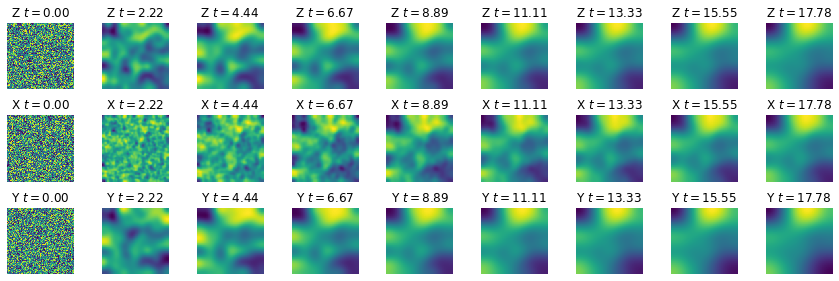

In [168]:
Z_rand = np.random.rand(size, size)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

plot_confound(X_rand, Y_rand, Z_rand, T=20, c0=0, cx=0.4, cy=0.4, a=2.64e-3, b=2.8e-4)

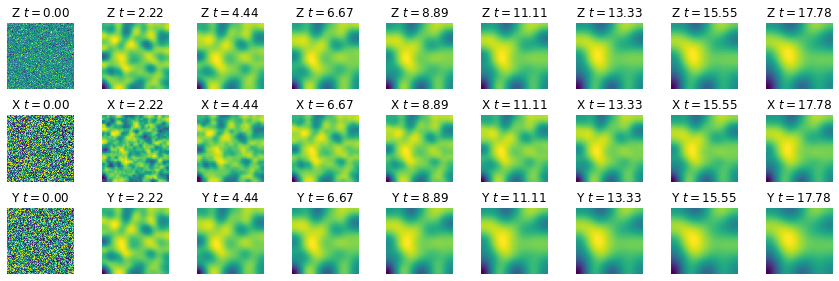

In [169]:
Z_rand = np.random.normal(1,2,(size, size))
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

plot_confound(X_rand, Y_rand, Z_rand, T=20, c0=0, cx=0.4, cy=0.4, dz=2.64e-3, dx=2.8e-4, dy=5e-3)

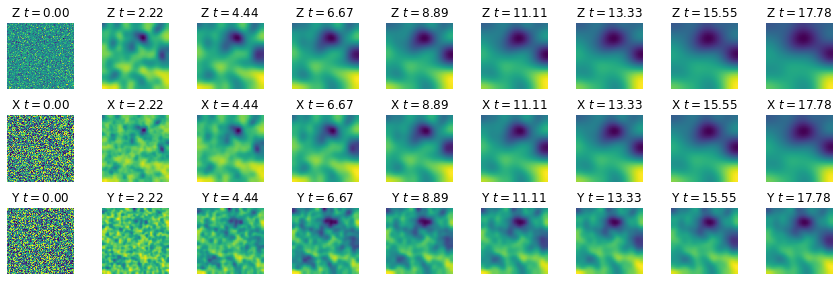

In [172]:
Z_rand = np.random.normal(1,2,(size, size))
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

plot_confound(X_rand, Y_rand, Z_rand, T=20, c0=0, cx=0.8, cy=0.1, dz=2.64e-3, dx=2.8e-4, dy=2.8e-4)

- what is strong, what is weak coupling? c
- when is burn in done? T
- initialize X and Y differently?